Code by Devashish Agarwal


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model,Sequential,initializers
import os
import cv2
from sklearn.model_selection import train_test_split

now its time to extract the data


In [2]:
img_size=224

In [3]:
X=[]
y=[]
labels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']#define the labels

In [4]:
for i in labels:
    folderpath=os.path.join('D:\PROJECTS FINAL YEAR\Training',i)
    for j in os.listdir(folderpath):
        img=cv2.imread(os.path.join(folderpath,j))## read all the images from the path using for loop
        img=cv2.resize(img,(img_size,img_size))
        X.append(img)
        y.append(i)
        
   
for i in labels:
    folderpath=os.path.join('D:\PROJECTS FINAL YEAR\Testing',i)
    for j in os.listdir(folderpath):
        img=cv2.imread(os.path.join(folderpath,j))## read all the images from the path using for loop
        img=cv2.resize(img,(img_size,img_size))
        X.append(img)
        y.append(i)
            

coonverting the list to array

In [5]:
X=np.array(X)
y=np.array(y)

In [6]:
X.shape

(3264, 224, 224, 3)

In [7]:
y.shape

(3264,)

In [8]:
# Splitting into train and test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

# Splitting the test set into validation and final test (50% validation, 50% test)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=50)

assigning labels on y 

In [9]:
y_train_new = []
y_val_new=[]
y_test_new=[]

## train 
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)
## val
for i in y_val:
    y_val_new.append(labels.index(i))
y_val=y_val_new
y_val=tf.keras.utils.to_categorical(y_val)

##test
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [10]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [11]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [12]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Flatten the output from the base model
x = Flatten()(base_model.output)

In [13]:
# Add a fully connected layer with 4 units (classes)
predictions = Dense(4, activation='softmax')(x)
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
72/72 [==============================] - 833s 12s/step - loss: 2.5822 - accuracy: 0.3704 - val_loss: 1.3850 - val_accuracy: 0.4122
Epoch 2/20
72/72 [==============================] - 795s 11s/step - loss: 1.1031 - accuracy: 0.5026 - val_loss: 1.0943 - val_accuracy: 0.5163
Epoch 3/20
72/72 [==============================] - 811s 11s/step - loss: 1.0408 - accuracy: 0.5512 - val_loss: 1.0188 - val_accuracy: 0.5694
Epoch 4/20
72/72 [==============================] - 800s 11s/step - loss: 1.0078 - accuracy: 0.5692 - val_loss: 1.0274 - val_accuracy: 0.5735
Epoch 5/20
72/72 [==============================] - 834s 12s/step - loss: 0.9271 - accuracy: 0.6222 - val_loss: 0.8370 - val_accuracy: 0.6531
Epoch 6/20
72/72 [==============================] - 810s 11s/step - loss: 0.8342 - accuracy: 0.6515 - val_loss: 0.7946 - val_accuracy: 0.6939
Epoch 7/20
72/72 [==============================] - 842s 12s/step - loss: 0.7834 - accuracy: 0.6852 - val_loss: 0.7260 - val_accuracy: 0.7163
Epoch 

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

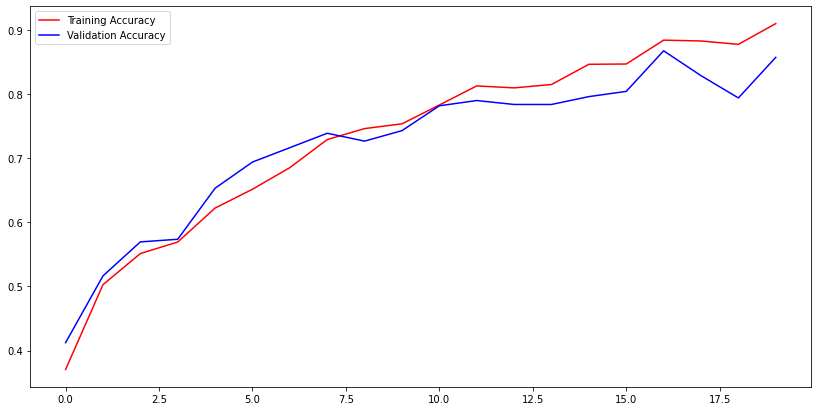

In [17]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

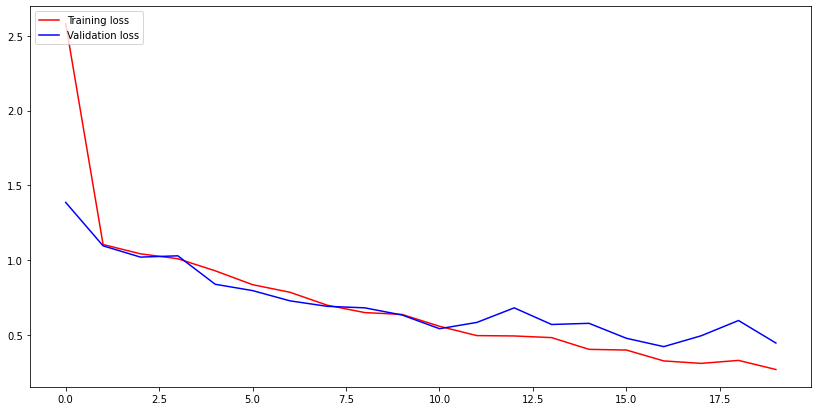

In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [19]:
model.save("vgg16.h5")

In [27]:
img = cv2.imread('D:\PROJECTS FINAL YEAR\Testing\meningioma_tumor\image(5).jpg')
img = cv2.resize(img,(224,224))
img_array = np.array(img)
img_array.shape

(224, 224, 3)

In [28]:
img_array = img_array.reshape(1,224,224,3)
img_array.shape

(1, 224, 224, 3)

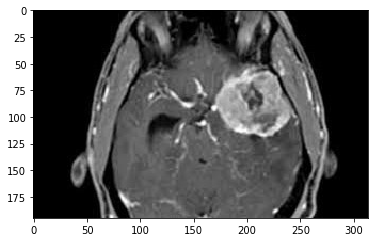

In [29]:
from tensorflow.keras.preprocessing import image
img = image.load_img('D:\PROJECTS FINAL YEAR\Testing\meningioma_tumor\image(5).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [30]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 131ms/step


0